# Linear Models

Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a _linear function_ of the input features, which we will explain shortly.


## Linear models for regression

For multiple linear regression, the general prediction formula for a linear model looks as follows:

$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_{1}x_1 + \hat{\beta}_{2}x_2 + \dots + \hat{\beta}_{p}x_p $

Here, $ x_1 $ to $ x_p $ denotes the features of a single data point, $ \hat{b}_i $ are parameters of the model that are learned, and $ \hat{y} $ is the prediction the model makes. For a dataset with a single feature, this is:

$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_{1}x $

which you might remember from high school mathematics as the equation for a line. Here, $\hat{b}_1$ is the slope and $\hat{b}_0$ is the y-axis offset (intercept). Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the values of $\hat{b}_i$.

## Simple linear regression

### Import the relevant libraries

In [30]:
# If not already installed, install the statmodels library
try:
    import statsmodels.api as sm
except (ImportError, ModuleNotFoundError):
    %pip install statsmodels

In [31]:
# If not already installed, install the seaborn library
try:
    import seaborn as sns
except (ImportError, ModuleNotFoundError):
    %pip install seaborn

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set_theme()

In [33]:
# Load the data from a .csv file
advertising = pd.read_csv("data/advertising_data.csv")

In [34]:
# Let's check what's inside this advertising frame
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [35]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Explore the data

Let’s now visualize the data using the matplolib and seaborn library. We’ll make a pairplot of all the columns and see which columns are the most correlated to Sales.

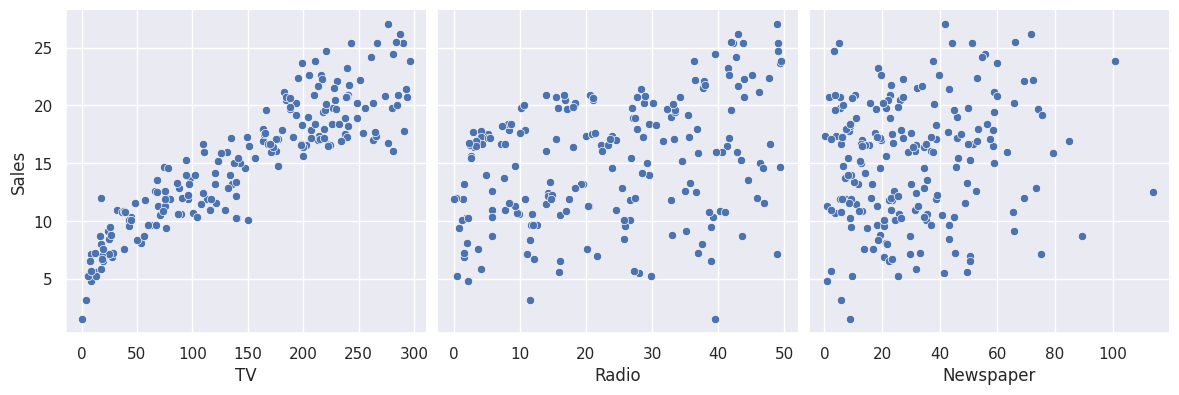

In [36]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

If we cannot determine the correlation using a scatter plot, we can use the seaborn heatmap to visualize the data.

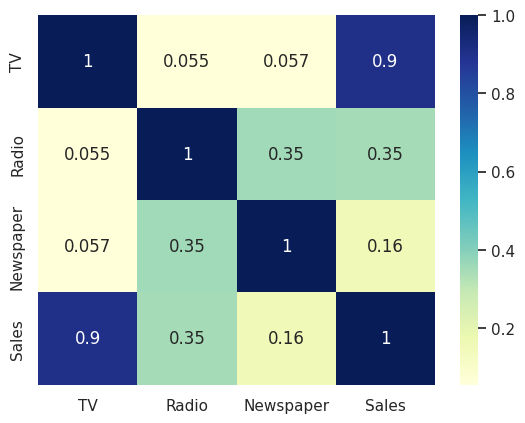

In [37]:
# Visualizing the data using heatmap
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As we can see from the above graphs, the TV column seems most correlated to Sales.

Let’s perform the simple linear regression model using TV as our feature variable.

### Performing Simple Linear Regression
Equation of simple linear regression

**y = c + mX**

In our case:

**y = c + m * TV**

The m values are known as model coefficients or model parameters.

We’ll perform simple linear regression in four steps.

1. Create X and y
2. Create Train and Test set
3. Train your model
4. Evaluate the model

### Create X and y

First, we’ll assign our feature variable/column TV as X and our target variable Sales as y.

In [38]:
# Creating X and y
X = advertising['TV'].values
y = advertising['Sales'].values

### Create Train and Test sets

We need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively.

We’ll split the data by importing `train_test_split` from the `sklearn.model_selection` library.

In [39]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

### Building and training the model

Using the following two packages, we can build a simple linear regression model.

* `statsmodel`
* `sklearn`

First, we’ll build the model using the `statsmodel` package. To do that, we need to import the `statsmodel.api` library to perform linear regression.

By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation **y = c + mX**, it has an intercept value as **c**. So, to have an intercept, we need to add the `add_constant` attribute manually.

In [40]:

import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the `statsmodel`. After that, we’ll see the parameters, i.e., `c` and `m` of the straight line.

In [41]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

array([6.9486832 , 0.05454575])

Let’s see the summary of all the different parameters of the regression line fitted like **R²**, probability of **F-statistic**, and **p-value**.

In [42]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.52e-52
Time:                        13:17:00   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
x1             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, the statistics we are mainly concerned with to determine whether the model is viable or not are:

1. The coefficients and its p-value(significance)
2. R-squared value
3. F-statistic and its significance

* The coefficient for TV is 0.054, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
* The R-squared value is 0.816, which means that 81.6% of the Sales variance can be explained by the TV column using this line.
* Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

*Sales = 6.948 + 0.054 * TV*

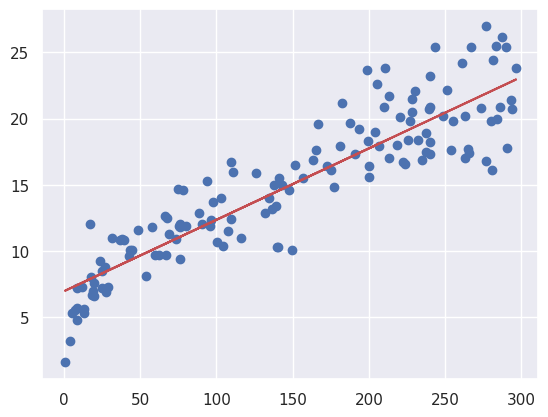

In [43]:

# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

This is how we build a simple linear regression model using training data. Now before evaluating the model on test data, we have to perform residual analysis.

### Residual Analysis
One of the major assumptions of the linear regression model is the error terms are normally distributed.

**Error = Actual y value - y predicted value**

Now from the dataset, we have to predict the y value from the training dataset of X using the predict attribute. After that, we’ll create the error terms (Residuals) from the predicted data.

In [44]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

Now, let’s plot the histogram of the residuals and see whether it looks like normal distribution or not.

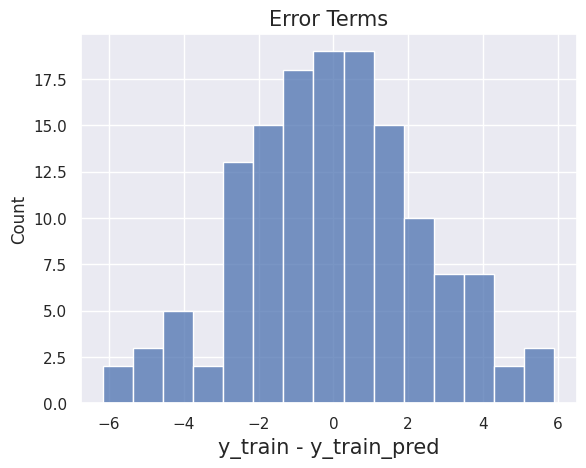

In [45]:

# Plotting the histogram using the residual values
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

As we can see, the residuals are following the normal distribution graph with a mean 0.

### Predictions on the Test data or Evaluating the model

Now that we have fitted the regression line on our train dataset, we can make some predictions to the test data. Similar to the training dataset, we have to `add_constant` to the test data and predict the y values using the `predict` attribute present in the `statsmodel`.

In [46]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

Now, let’s calculate the **R²** value for the above-predicted y-values. We can do that by merely importing the `r2_score` library from `sklearn.metrics` package.

In [47]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

The R² value by using the above code = 0.792

If we can remember from the training data, the R² value = 0.815

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

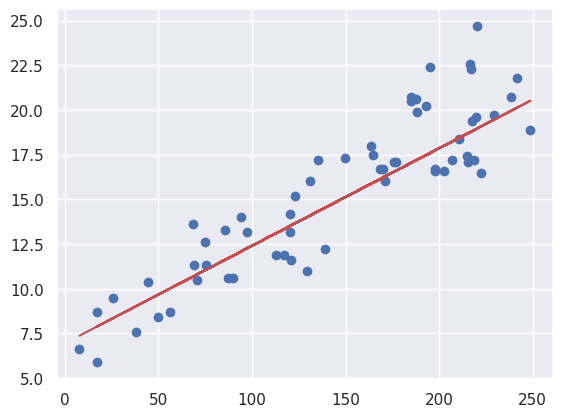

In [48]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

## Linear regression with Scikit-learn

Similar to statsmodel, we’ll split the data into train and test.

In [49]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [50]:
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


Because our model has a single predictor variable, the `X_train` and `X_tests` have the shape of a vector as opposed to a matrix. `skearn` models expect the input X to be a matrix. To make it work, we will add an extra dimension to each.

In [51]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

print(X_train.shape)
print(X_test.shape)

(140, 1)
(60, 1)


Now, let’s fit the line to the plot importing the `LinearRegression` library from the `sklearn.linear_model`.

In [52]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lr = LinearRegression()

# Fit the model using .fit() method
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


The “slope” parameters $\hat{b}_1 \dots \hat{b}_p$, also called weights or coefficients, are stored in the ```coef_``` attribute, while the offset or intercept ($\hat{b}_0$) is stored in the ```intercept_``` attribute:

In [53]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.05454575]
lr.intercept_: 6.948683200001357


__NOTE:__ You might notice the strange-looking trailing underscore at the end of ```coef_``` and ```intercept_```. scikit-learnalways stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.

The ```intercept_``` attribute is always a single float number, while the ```coef_``` attribute is a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, ```lr.coef_``` only has a single entry.

Let’s look at the training set and test set performance:

In [54]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.79


Same as the statesmodel, the R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.

## k-neighbors regression

There is also a regression variant of the k-nearest neighbors algorithm. 

The k-nearest neighbors algorithm for regression is implemented in the ```KNeighborsRegressor``` class in scikit-learn. It’s used similarly to KNeighborsClassifier:

In [55]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Now we can make predictions on the test set:

In [56]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [ 5.33333333 19.03333333 14.06666667 19.93333333 21.5        19.83333333
 11.33333333 19.2        18.9        18.9        14.56666667 21.36666667
  9.86666667 19.4        13.4        13.16666667 13.73333333 17.86666667
 18.03333333 14.56666667 18.9        14.26666667 20.4        16.26666667
 19.6        18.26666667 18.26666667 12.86666667 19.6        13.26666667
 11.16666667 11.16666667 14.3        18.73333333  9.93333333 14.3
 12.63333333 17.86666667 17.8        18.73333333 18.9        15.76666667
 18.03333333 18.26666667 14.3        13.4         8.9        20.
 11.56666667 10.83333333 19.06666667 17.36666667 12.86666667 13.36666667
 20.56666667  9.93333333  8.9         8.16666667 19.2        12.26666667]


We can also evaluate the model using the score method, which for regressors returns the $R^2$ score. The $R^2$ score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score that’s usually between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, ```y_train```. The formulation of $R^2$ used here can even be negative, which can indicate anticorrelated predictions.

In [57]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.78


Here, the score is 0.78, similar to the Linera Regression model.

#### Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x-axis, which corresponds to the single feature:

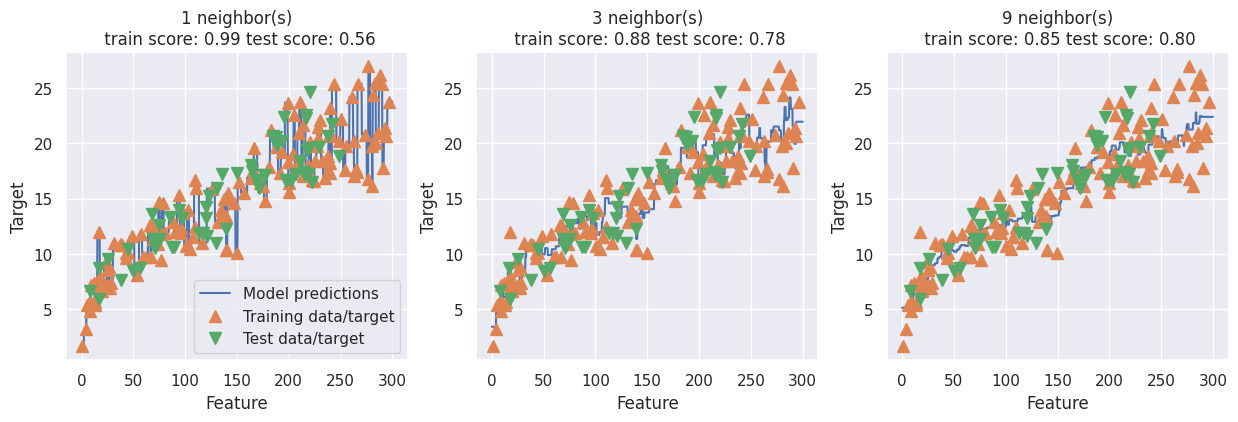

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(0, 300, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

#### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the k-nearest neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.